In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [19]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    # print(list(V.items())[:10])
    def update(states, rewards,returns_sum,returns_count):
        assert(len(states) ==len(rewards))
        length = len(states)
        for i in range(length):
            returns_count[states[i]]+=1
            discount = 1
            for j in range(i,length):
                returns_sum[states[i]] += rewards[j]*discount
                discount = discount*discount_factor
            V[states[i]] = returns_sum[states[i]]/returns_count[states[i]]


    for _ in range(num_episodes):
        observation = env.reset()
        states = []
        rewards = []
        for t in range(100):
            score, dealer_score, usable_ace = observation
            states.append(observation)
            # returns_count[score] +=1
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        update(states, rewards,returns_sum,returns_count)

    return V    

In [20]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

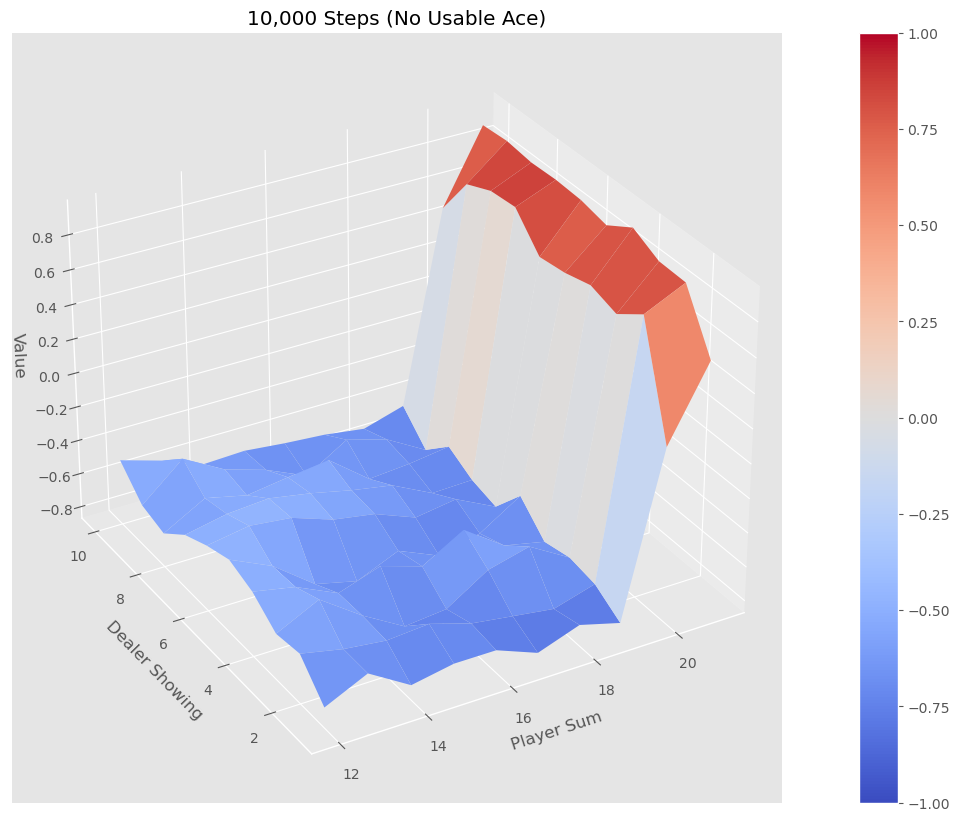

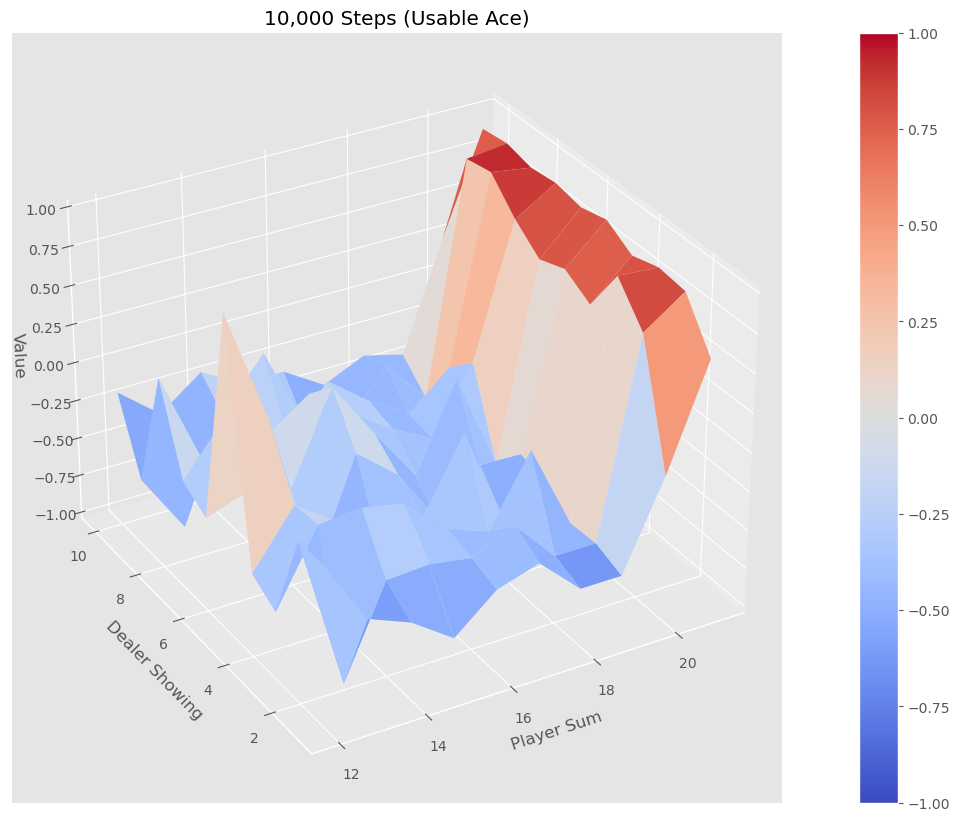

In [ ]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")